In [1]:

import sys 
import os

from PIL import Image
from IPython import display

sys.path.append("..")
sys.path.append("../utlities")

from utlities.directories import IMAGES_FOLDER

from utlities.pinecone_index_utilities import create_index, get_embeddings_and_upsert, create_index
from utlities.generate_rag_keywords import KeywordRAGIndexCreator, SingleImagePromptHandler


# Prompt testing
Prompt uses chain of thought reasoning to figure out the type of email being sent

In [2]:
EMAIL_TYPE_SYSTEM_PROMPT = """You are a helpful bot who provides detailed information for professionally done marketing emails.
  
Return the output as a json object like so:
{
    "email_content_description": "...", # Describe the main topic described in this email. Avoid any discussion of the product being sold. If the email contains multiple topics, we only care about the top of the email, a.k.a. what is "above the fold" at the top of the email. 1-2 sentences, up to 30 words. 
    "calls_to_action_description": "..." # 1 sentence, up to 15 words.
    "tags": ["First Tag", "Second", ...], #  3-6 tags that we can use for searching. These should be email marketing terms related to the email being sent out, like "Sale", or "Browse Abandonment" or "Survey". AVOID any tags related to the industry or product.
    
}

Please AVOID any discussion that is generic to many well-made marketing emails. 
Some examples of overly generic things to call outare things like "Clean Spacing", Mobile-Optimized", or "Professional". We can assume that all emails in our dataset are like this. 

JSON object:
"""



{'email_content_description': 'Email focuses on customizing newsletter preferences to receive personalized style news and updates, emphasizing the value of targeted content delivery.', 'calls_to_action_description': 'Click to manage email preferences for personalized style news delivery.', 'tags': ['Preference Management', 'Newsletter Signup', 'Email Customization', 'Customer Engagement', 'Personalization']}


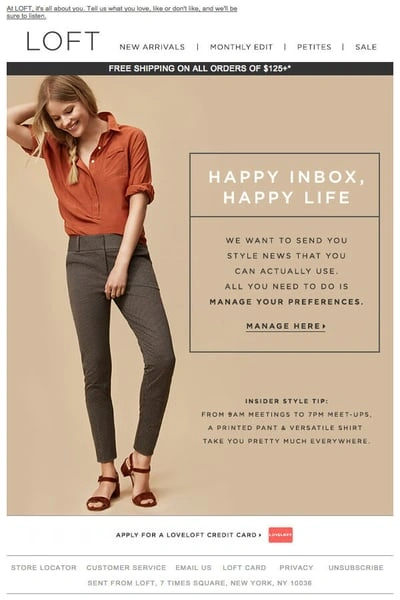

In [4]:
image_file = "email-marketing-examples_25.webp"

print(SingleImagePromptHandler().create_image_tags_single_image(
    image_file,
    EMAIL_TYPE_SYSTEM_PROMPT
))
Image.open(os.path.join(IMAGES_FOLDER, image_file))

{'email_content_description': 'Order confirmation email showing purchase details and shipping status with a visual progress tracker indicating the order has been confirmed.', 'calls_to_action_description': 'View complete order details or cancel order within 30 minutes of submission.', 'tags': ['Order Confirmation', 'Transactional Email', 'Purchase Receipt', 'Order Tracking']}


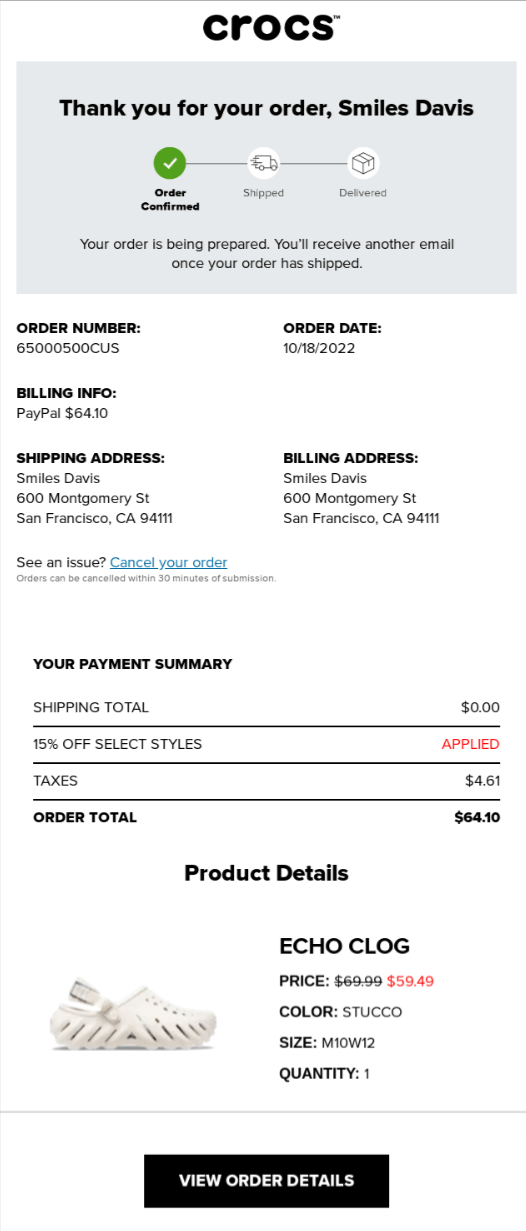

In [5]:
image_file = "crocs-order-details.png"

print(SingleImagePromptHandler().create_image_tags_single_image(
    image_file,
    EMAIL_TYPE_SYSTEM_PROMPT
))

Image.open(os.path.join(IMAGES_FOLDER, image_file))

# Build keywords for each email, create pinecone index

In [12]:
b = KeywordRAGIndexCreator(
    index_name='email-type',
    data_extraction_prompt=EMAIL_TYPE_SYSTEM_PROMPT, 
    tags_to_ignore=['email_content_description','calls_to_action_description']
).create_image_tags_full_dataset()
 

In [13]:
create_index('email-type')
get_embeddings_and_upsert('email-type')



Index before upsert:
{'dimension': 1024,
 'index_fullness': 0.0,
 'namespaces': {'email-type': {'vector_count': 308}},
 'total_vector_count': 308}


Index after upsert:
{'dimension': 1024,
 'index_fullness': 0.0,
 'namespaces': {'email-type': {'vector_count': 308}},
 'total_vector_count': 308}




# Test out another prompt that focuses more on the intended audience

In [2]:
EMAIL_AUDIENCE_SYSTEM_PROMPT = """You are a helpful bot who provides detailed tags for professionally done marketing emails. 
First, describe the header area of an email in 1 sentence (up to 15 words). Marketing emails usually contain multiple topics / components.
We only care about the first one, a.k.a. what is "above the fold" at the top of the email. 

Return the output as a json object like so:
{
    "header_area_description": "...", # 1 sentence, up to 15 words, describe the product being sold and communication style
    "audience_description": 2 sentences, try to imagine the demographics and user persona of the intended audience. Describe it as a professional marketer would.
    "audience_tags": ["First Tag", "Second", ...], # 3-6 tags. Describe in a marketer's terms what the intended audience for this product might be.
}
"""


{'header_area_description': 'LOFT promotes versatile workwear with casual-chic styling and email preference management.', 'audience_description': 'Professional women aged 25-45 who prioritize polished yet comfortable clothing that transitions from office to social settings. These consumers value versatility in their wardrobe and appreciate curated style recommendations that simplify their shopping experience.', 'audience_tags': ['Career-Focused Women', 'Urban Professionals', 'Style-Conscious', 'Value-Oriented Shoppers', 'Business Casual Fashion']}


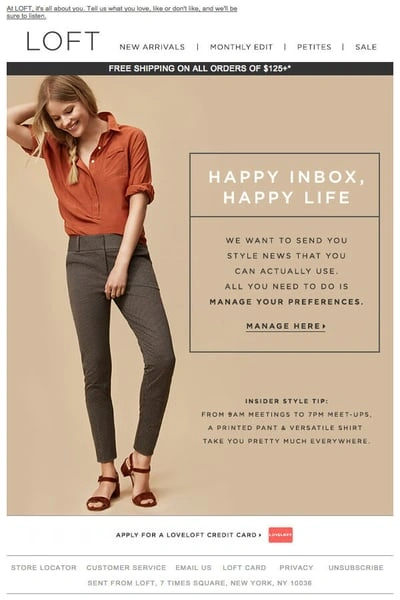

In [24]:
image_file = "email-marketing-examples_25.webp"
 
    
print(SingleImagePromptHandler().create_image_tags_single_image(
    image_file,
    EMAIL_AUDIENCE_SYSTEM_PROMPT
))
Image.open(os.path.join(IMAGES_FOLDER, image_file))

{'header_area_description': 'Playful marketing for healthy cereal brand promising nostalgic childhood flavors without unhealthy ingredients.', 'audience_description': 'Health-conscious millennials who grew up with sugary cereals but now seek better nutritional choices. These consumers balance nostalgia with wellness, having disposable income to spend on premium food products that align with their evolved dietary preferences.', 'audience_tags': ['Health-Conscious Millennials', 'Nostalgic Foodies', 'Wellness Enthusiasts', 'Clean Label Seekers', 'Urban Professionals']}


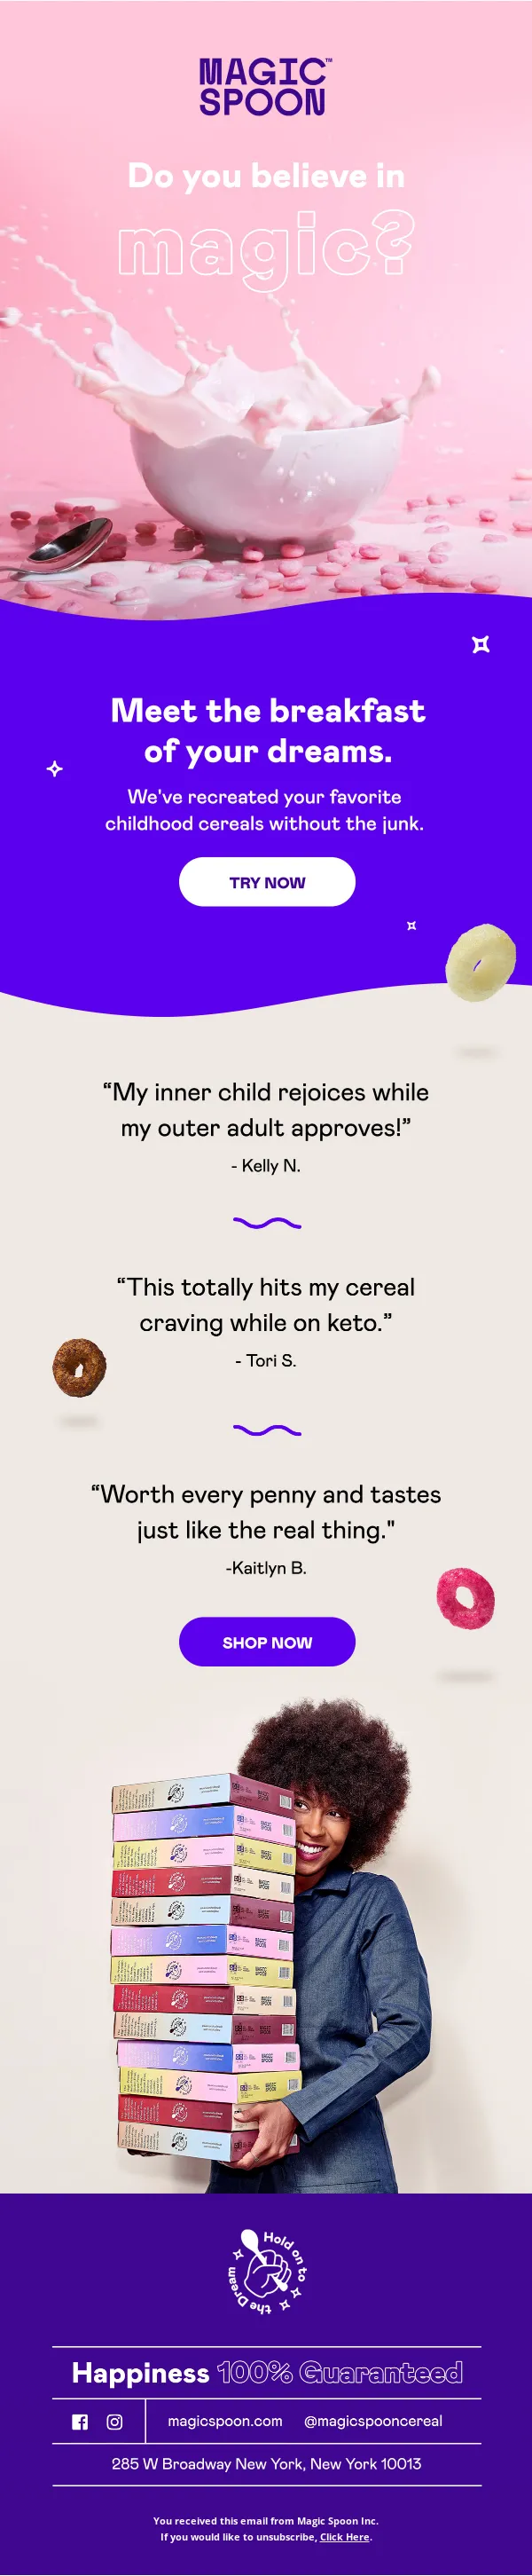

In [25]:
image_file = "welcome-email-magic-spoon.webp"
 
print(SingleImagePromptHandler().create_image_tags_single_image(
    image_file,
    EMAIL_AUDIENCE_SYSTEM_PROMPT
))
Image.open(os.path.join(IMAGES_FOLDER, image_file))

In [3]:
b = KeywordRAGIndexCreator(
    index_name='email-audience', 
    data_extraction_prompt=EMAIL_AUDIENCE_SYSTEM_PROMPT,  
    tags_to_ignore=['header_area_description', 'audience_description']
).create_image_tags_full_dataset()
 

315 tag sets to create
batch starting with image 0, 2025-03-05 16:43:41.510183
batch starting with image 50, 2025-03-05 16:44:02.827748
batch starting with image 100, 2025-03-05 16:44:16.160168
batch starting with image 150, 2025-03-05 16:44:30.619384
batch starting with image 200, 2025-03-05 16:44:44.935789
batch starting with image 250, 2025-03-05 16:44:59.807107
batch starting with image 300, 2025-03-05 16:45:19.150911
Waiting for batch msgbatch_018Csu95K1Wwd97928vxJTo9
Batch msgbatch_018Csu95K1Wwd97928vxJTo9 status: ended, 2025-03-05 16:45:24.110490
Batch msgbatch_018Csu95K1Wwd97928vxJTo9 finished successfully. Grabbing data.
Waiting for batch msgbatch_01XDT8cC6QgEXyokvuC2wEiP
Batch msgbatch_01XDT8cC6QgEXyokvuC2wEiP status: ended, 2025-03-05 16:45:24.859651
Batch msgbatch_01XDT8cC6QgEXyokvuC2wEiP finished successfully. Grabbing data.
Waiting for batch msgbatch_012JJp2vUZ25zW8dV1Jj8wbN
Batch msgbatch_012JJp2vUZ25zW8dV1Jj8wbN status: ended, 2025-03-05 16:45:25.670558
Batch msgbatch_0

In [5]:

create_index('email-audience')
get_embeddings_and_upsert('email-audience')


Index before upsert:
{'dimension': 1024,
 'index_fullness': 0.0,
 'namespaces': {'email-audience': {'vector_count': 308}},
 'total_vector_count': 308}


Index after upsert:
{'dimension': 1024,
 'index_fullness': 0.0,
 'namespaces': {'email-audience': {'vector_count': 308}},
 'total_vector_count': 308}


